In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf

In [2]:
org_data = yf.download(tickers = '^RUI', start = '2014-03-11',end = '2024-07-10')
org_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RUI,^RUI,^RUI,^RUI,^RUI,^RUI
Date,,,,,,
2014-03-11 00:00:00+00:00,1044.680054,1044.680054,1053.300049,1042.550049,1050.920044,0
2014-03-12 00:00:00+00:00,1045.270020,1045.270020,1045.280029,1037.119995,1042.479980,0
2014-03-13 00:00:00+00:00,1032.939941,1032.939941,1048.660034,1030.319946,1046.630005,0
2014-03-14 00:00:00+00:00,1030.800049,1030.800049,1036.599976,1029.910034,1031.880005,0
2014-03-17 00:00:00+00:00,1040.219971,1040.219971,1042.510010,1033.989990,1033.989990,0
...,...,...,...,...,...,...
2024-07-02 00:00:00+00:00,2998.479980,2998.479980,2998.820068,2972.939941,2974.409912,0
2024-07-03 00:00:00+00:00,3013.159912,3013.159912,3014.360107,2998.340088,3009.159912,0


In [3]:
data = pd.DataFrame(index=org_data.index)
data['Adj Close'] = org_data['Adj Close']['^RUI']
data['Open'] = org_data['Open']['^RUI']
data['Close'] = org_data['Close']['^RUI']
data['High'] = org_data['High']['^RUI']
data['Low'] = org_data['Low']['^RUI']
# data['Volume'] = org_data['Volume']['^RUI']

In [4]:
data.columns

Index(['Adj Close', 'Open', 'Close', 'High', 'Low'], dtype='object')

In [5]:
data.index.names

FrozenList(['Date'])

In [6]:
data

,Adj Close,Open,Close,High,Low
Date,,,,,
2014-03-11 00:00:00+00:00,1044.680054,1050.920044,1044.680054,1053.300049,1042.550049
2014-03-12 00:00:00+00:00,1045.270020,1042.479980,1045.270020,1045.280029,1037.119995
2014-03-13 00:00:00+00:00,1032.939941,1046.630005,1032.939941,1048.660034,1030.319946
2014-03-14 00:00:00+00:00,1030.800049,1031.880005,1030.800049,1036.599976,1029.910034
2014-03-17 00:00:00+00:00,1040.219971,1033.989990,1040.219971,1042.510010,1033.989990
...,...,...,...,...,...
2024-07-02 00:00:00+00:00,2998.479980,2974.409912,2998.479980,2998.820068,2972.939941
2024-07-03 00:00:00+00:00,3013.159912,3009.159912,3013.159912,3014.360107,2998.340088
2024-07-05 00:00:00+00:00,3027.860107,3013.479980,3027.860107,3029.439941,3009.899902


In [7]:
# Adding indicators
data['RSI']=ta.rsi(data['Close'], length=15)
scaler = ta.ema(data['Close'], length=500)
data['EMAF']=ta.ema(data['Close'], length=20)
data['EMAM']=ta.ema(data['Close'], length=100)
data['EMAS']=ta.ema(data['Close'], length=150)

data['NextCandleMovement'] = data['Adj Close']-data.Open
data['NextCandleMovement'] = data['NextCandleMovement'].shift(-1)

# data['TargetClass'] = [1 if data.NextCandleMovement[i]>0 else 0 for i in range(len(data))]
# 
# data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True, drop=True)
# data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data.drop(['Close'], axis=1, inplace=True)

In [8]:
data

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,NextCandleMovement
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039
...,...,...,...,...,...,...,...,...,...
2444,2980.850098,2981.949951,2984.949951,2966.399902,66.257906,2952.935312,2832.424685,2767.694222,24.070068
2445,2998.479980,2974.409912,2998.820068,2972.939941,70.083997,2957.272899,2835.712908,2770.750987,4.000000
2446,3013.159912,3009.159912,3014.360107,2998.340088,72.832354,2962.595472,2839.226711,2773.961702,14.380127
2447,3027.860107,3013.479980,3029.439941,3009.899902,75.269925,2968.811151,2842.962025,2777.324594,-0.560059


In [9]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Adj Close,Open,High,Low,RSI,EMAF,EMAM,EMAS,NextCandleMovement
0,1057.089966,1070.109985,1075.160034,1057.040039,34.465855,1091.443283,1086.583582,1076.719736,-17.380005
1,1039.380005,1056.760010,1060.709961,1039.030029,30.085160,1086.484875,1085.648858,1076.225170,-0.939941
2,1041.790039,1042.729980,1053.500000,1038.410034,31.357249,1082.228224,1084.780366,1075.769075,-1.790039
3,1034.479980,1036.270020,1038.359985,1010.799988,29.606606,1077.680773,1083.784319,1075.222200,8.209961
4,1035.989990,1027.780029,1043.010010,1019.520020,30.465778,1073.710222,1082.837897,1074.702568,8.790039
5,1049.040039,1040.250000,1055.520020,1040.250000,37.526365,1071.360681,1082.168632,1074.362667,10.339966
6,1058.819946,1048.479980,1059.290039,1046.829956,42.235981,1070.166325,1081.706282,1074.156803,17.209961
7,1080.250000,1063.040039,1080.910034,1063.040039,50.922110,1071.126675,1081.677445,1074.237507,-9.339966
8,1071.780029,1081.119995,1084.660034,1071.670044,47.873605,1071.188899,1081.481456,1074.204958,8.849976
9,1085.130005,1076.280029,1091.369995,1076.280029,52.659620,1072.516624,1081.553705,1074.349661,6.500000


In [10]:
#NextCandleMovement column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[-0.94943214 -0.93743212 -0.94163423 ... -0.99421922 -0.99699632
   0.11978467]
 [-0.96692346 -0.95061937 -0.95594109 ... -0.99527827 -0.99757593
   0.23763458]
 [-0.96454318 -0.96447837 -0.96307959 ... -0.99626229 -0.99811046
   0.23154069]
 ...
 [ 0.98248891  0.97798167  0.97834687 ...  0.99155149  0.99212274
   0.34745586]
 [ 0.99700762  0.98224908  0.99327726 ...  0.99578366  0.99606396
   0.24035776]
 [ 1.          1.          1.         ...  1.          1.
   0.21225796]]


In [12]:
data_set_scaled.shape

(2449, 9)

In [13]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(6):#data_set_scaled[0].size):#2 columns are target not X
# for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
# for j in range(4):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[-0.94943214 -0.93743212 -0.94163423 -0.93941658 -0.50667341
   -0.95004878]
  [-0.96692346 -0.95061937 -0.95594109 -0.95716104 -0.63757793
   -0.95518298]
  [-0.96454318 -0.96447837 -0.96307959 -0.9577719  -0.5995652
   -0.95959055]
  ...
  [-0.86749625 -0.87397519 -0.8750013  -0.86334503  0.54081165
   -0.92205332]
  [-0.86945191 -0.86930286 -0.87733789 -0.86415289  0.48512538
   -0.92012149]
  [-0.8668346  -0.87294782 -0.8761398  -0.86409383  0.52090007
   -0.91811231]]

 [[-0.96692346 -0.95061937 -0.95594109 -0.95716104 -0.63757793
   -0.95518298]
  [-0.96454318 -0.96447837 -0.96307959 -0.9577719  -0.5995652
   -0.95959055]
  [-0.971763   -0.97085959 -0.97806956 -0.98497485 -0.65187815
   -0.96429922]
  ...
  [-0.86945191 -0.86930286 -0.87733789 -0.86415289  0.48512538
   -0.92012149]
  [-0.8668346  -0.87294782 -0.8761398  -0.86409383  0.52090007
   -0.91811231]
  [-0.86102719 -0.86367227 -0.86638745 -0.85454664  0.59617654
   -0.91571462]]

 [[-0.96454318 -0.96447837 -0.963

In [14]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [15]:
X

array([[[-0.94943214, -0.93743212, -0.94163423, -0.93941658,
         -0.50667341, -0.95004878],
        [-0.96692346, -0.95061937, -0.95594109, -0.95716104,
         -0.63757793, -0.95518298],
        [-0.96454318, -0.96447837, -0.96307959, -0.9577719 ,
         -0.5995652 , -0.95959055],
        ...,
        [-0.86749625, -0.87397519, -0.8750013 , -0.86334503,
          0.54081165, -0.92205332],
        [-0.86945191, -0.86930286, -0.87733789, -0.86415289,
          0.48512538, -0.92012149],
        [-0.8668346 , -0.87294782, -0.8761398 , -0.86409383,
          0.52090007, -0.91811231]],

       [[-0.96692346, -0.95061937, -0.95594109, -0.95716104,
         -0.63757793, -0.95518298],
        [-0.96454318, -0.96447837, -0.96307959, -0.9577719 ,
         -0.5995652 , -0.95959055],
        [-0.971763  , -0.97085959, -0.97806956, -0.98497485,
         -0.65187815, -0.96429922],
        ...,
        [-0.86945191, -0.86930286, -0.87733789, -0.86415289,
          0.48512538, -0.92012149],
  

In [16]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 6)
(484, 30, 6)
(1935, 1)
(484, 1)
[[0.25978488]
 [0.22673839]
 [0.26301033]
 ...
 [0.29985632]
 [0.22028747]
 [0.42286644]]


In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Activation
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 6), name='lstm_input')
# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
inputs = LSTM(2000, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 [==============================] - 903s 8s/step - loss: 0.0727 - val_loss: 0.0622
Epoch 2/30
117/117 [==============================] - 519s 4s/step - loss: 0.0139 - val_loss: 0.0586
Epoch 3/30
117/117 [==============================] - 514s 4s/step - loss: 0.0138 - val_loss: 0.0507
Epoch 4/30
117/117 [==============================] - 503s 4s/step - loss: 0.0138 - val_loss: 0.0513
Epoch 5/30
117/117 [==============================] - 500s 4s/step - loss: 0.0133 - val_loss: 0.0507
Epoch 6/30
117/117 [==============================] - 498s 4s/step - loss: 0.0137 - val_loss: 0.0508
Epoch 7/30
117/117 [==============================] - 391s 3s/step - loss: 0.0135 - val_loss: 0.0504
Epoch 8/30
117/117 [==============================] - 341s 3s/step - loss: 0.0138 - val_loss: 0.0509
Epoch 9/30
117/117 [==============================] - 291s 2s/step - loss: 0.0135 - val_loss: 0.0535
Epoch 10/30
117/117 [==============================] - 278s 2s/step - loss: 0.0133 - val_lo

In [18]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 37s 2s/step
[0.24874866] [0.23096666]
[0.25724906] [0.40200685]
[0.2572121] [0.20200755]
[0.25556636] [0.17068055]
[0.2558612] [0.46143366]
[0.25318855] [0.16014312]
[0.26182425] [0.50652179]
[0.2575695] [0.34379813]
[0.25708145] [0.30028684]
[0.2535407] [0.16000137]


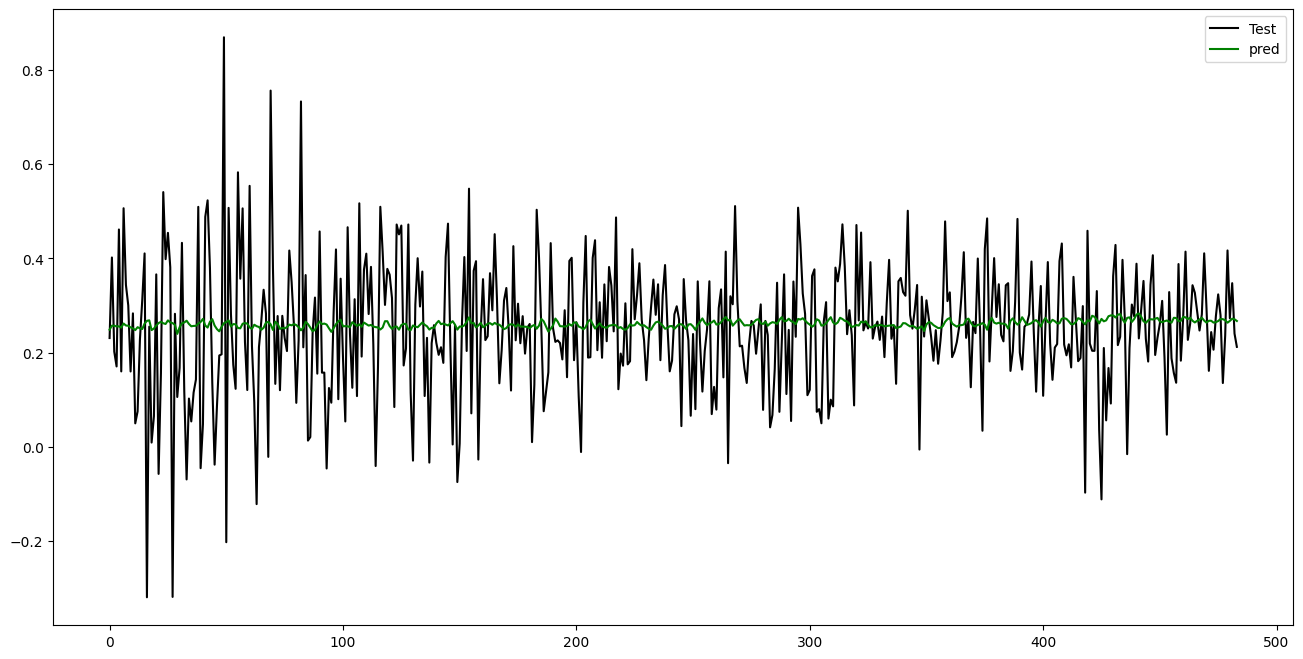

In [19]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()